# Data Exploration

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import our dataframe fromn webscraping
df = pd.read_csv('final_data')

In [3]:
df = df.drop('Unnamed: 0', axis=1)

In [4]:
df = df.reset_index(drop=True)

In [5]:
# Look at columns with non-null rating value
df[df.Rating == df.Rating]

,Make,Model,Price,Rating,Year,Type,Miles,Litres,BHP,Transmission,Fuel,Owners,ULEZ
0,Ford,B-Max,"7,850",Good price,2017.0,MPV,"21,000",1.6,105PS,Automatic,Petrol,NaN,ULEZ
1,Ford,B-Max,"5,480",Lower price,2013.0,MPV,"36,511",1.5,75PS,Manual,Diesel,NaN,NaN
2,Ford,B-Max,"9,000",Great price,2017.0,MPV,"17,574",1.6,105PS,Automatic,Petrol,1.0,ULEZ
3,Ford,B-Max,"6,250",Good price,2014.0,MPV,"57,513",1.6,103BHP,Automatic,Petrol,NaN,ULEZ
4,Ford,B-Max,"10,000",Good price,2017.0,MPV,"14,884",1.0,100PS,Manual,Petrol,NaN,ULEZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...
313350,Renault,Twingo,"5,500",Good price,2015.0,Hatchback,"19,813",1.0,70PS,Manual,Petrol,NaN,ULEZ
313351,Renault,Twingo,"4,350",Good price,2012.0,Hatchback,"12,260",1.2,75BHP,Manual,Petrol,NaN,ULEZ
313352,Renault,Twingo,"7,499",Good price,2016.0,Hatchback,"13,480",0.9,90PS,Automatic,Petrol,2.0,ULEZ
313353,Renault,Twingo,"5,799",Fair price,2016.0,Hatchback,"19,207",1.0,70PS,Manual,Petrol,NaN,ULEZ


In [6]:
df.Make.unique()

array(['Ford', 'Audi', 'Bmw', 'Vauxhall', 'Volkswagen', 'Vw', 'Toyota',
       'Nissan', 'Mercedes-Benz', 'Mercedes', 'Land Rover', 'Honda',
       'Jaguar', 'Citroen', 'Hyundai', 'Volvo', 'Suzuki', 'Porsche',
       'Skoda', 'Peugeot', 'Mini', 'Kia', 'Fiat', 'Mazda', 'Mazda2',
       'Mazda6', 'Mazda3', 'Mitsubishi', 'Renault'], dtype=object)

We see we have a few makes that we don't want, i.e for Mazda, Mercedes and Volkswagen, let's fix this

(Note, if I were to create this function again i would've used the .apply method with a lambda expression, as it would be much quicker)

In [7]:
def fix_makes(df):
    for i in range(len(df)):
        if 'Mazda6' in df.iloc[i].Make:
            df.at[i, 'Make'] = 'Mazda'
            df.at[i, 'Model'] = 'Mazda6'
        if 'Mazda3' in df.iloc[i].Make:
            df.at[i, 'Make'] = 'Mazda'
            df.at[i, 'Model'] = 'Mazda3'  
        if 'Mazda2' in df.iloc[i].Make:
            df.at[i, 'Make'] = 'Mazda'
            df.at[i, 'Model'] = 'Mazda2'
        if 'Mercedes' in df.iloc[i].Make:
            df.at[i, 'Make'] = 'Mercedes-Benz'
        if 'Vw' in df.iloc[i].Make:
            df.at[i, 'Make'] = 'Volkswagen'
        if i%100 == 0:
            print(i)
    return df

In [8]:
df = fix_makes(df)
df

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

133000
133100
133200
133300
133400
133500
133600
133700
133800
133900
134000
134100
134200
134300
134400
134500
134600
134700
134800
134900
135000
135100
135200
135300
135400
135500
135600
135700
135800
135900
136000
136100
136200
136300
136400
136500
136600
136700
136800
136900
137000
137100
137200
137300
137400
137500
137600
137700
137800
137900
138000
138100
138200
138300
138400
138500
138600
138700
138800
138900
139000
139100
139200
139300
139400
139500
139600
139700
139800
139900
140000
140100
140200
140300
140400
140500
140600
140700
140800
140900
141000
141100
141200
141300
141400
141500
141600
141700
141800
141900
142000
142100
142200
142300
142400
142500
142600
142700
142800
142900
143000
143100
143200
143300
143400
143500
143600
143700
143800
143900
144000
144100
144200
144300
144400
144500
144600
144700
144800
144900
145000
145100
145200
145300
145400
145500
145600
145700
145800
145900
146000
146100
146200
146300
146400
146500
146600
146700
146800
146900
147000
147100
147200

250300
250400
250500
250600
250700
250800
250900
251000
251100
251200
251300
251400
251500
251600
251700
251800
251900
252000
252100
252200
252300
252400
252500
252600
252700
252800
252900
253000
253100
253200
253300
253400
253500
253600
253700
253800
253900
254000
254100
254200
254300
254400
254500
254600
254700
254800
254900
255000
255100
255200
255300
255400
255500
255600
255700
255800
255900
256000
256100
256200
256300
256400
256500
256600
256700
256800
256900
257000
257100
257200
257300
257400
257500
257600
257700
257800
257900
258000
258100
258200
258300
258400
258500
258600
258700
258800
258900
259000
259100
259200
259300
259400
259500
259600
259700
259800
259900
260000
260100
260200
260300
260400
260500
260600
260700
260800
260900
261000
261100
261200
261300
261400
261500
261600
261700
261800
261900
262000
262100
262200
262300
262400
262500
262600
262700
262800
262900
263000
263100
263200
263300
263400
263500
263600
263700
263800
263900
264000
264100
264200
264300
264400
264500

,Make,Model,Price,Rating,Year,Type,Miles,Litres,BHP,Transmission,Fuel,Owners,ULEZ
0,Ford,B-Max,"7,850",Good price,2017.0,MPV,"21,000",1.6,105PS,Automatic,Petrol,NaN,ULEZ
1,Ford,B-Max,"5,480",Lower price,2013.0,MPV,"36,511",1.5,75PS,Manual,Diesel,NaN,NaN
2,Ford,B-Max,"9,000",Great price,2017.0,MPV,"17,574",1.6,105PS,Automatic,Petrol,1.0,ULEZ
3,Ford,B-Max,"6,250",Good price,2014.0,MPV,"57,513",1.6,103BHP,Automatic,Petrol,NaN,ULEZ
4,Ford,B-Max,"10,000",Good price,2017.0,MPV,"14,884",1.0,100PS,Manual,Petrol,NaN,ULEZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...
313350,Renault,Twingo,"5,500",Good price,2015.0,Hatchback,"19,813",1.0,70PS,Manual,Petrol,NaN,ULEZ
313351,Renault,Twingo,"4,350",Good price,2012.0,Hatchback,"12,260",1.2,75BHP,Manual,Petrol,NaN,ULEZ
313352,Renault,Twingo,"7,499",Good price,2016.0,Hatchback,"13,480",0.9,90PS,Automatic,Petrol,2.0,ULEZ
313353,Renault,Twingo,"5,799",Fair price,2016.0,Hatchback,"19,207",1.0,70PS,Manual,Petrol,NaN,ULEZ


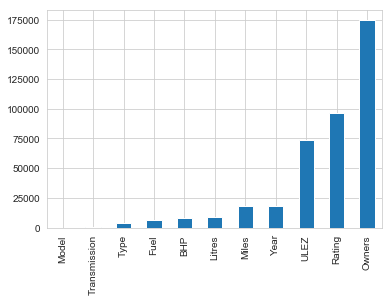

In [9]:
# Visualising null entries
sns.set_style("whitegrid")
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [10]:
# Looking at which rows have a null model entry
df[df.Model != df.Model]

,Make,Model,Price,Rating,Year,Type,Miles,Litres,BHP,Transmission,Fuel,Owners,ULEZ
235600,Skoda,NaN,"16,990",NaN,2019.0,Hatchback,"2,653",1.0,115PS,Manual,Petrol,NaN,ULEZ


In [11]:
# Creating a function to clean the data

def clean_data(df):
    
    df = df.reset_index(drop=True)
    
    # Transform ULEZ column
    df['ULEZ'] = df['ULEZ'].fillna(0)
    d = {'ULEZ': 1}
    df = df.replace({'ULEZ': d})
    
    # Drop duplicate adverts
    dfrate = df[df['Rating'] == df['Rating']]
    dfrate.drop_duplicates()
    df = df[df['Rating'] != df['Rating']]
    df = df.append(dfrate.drop_duplicates(), ignore_index=True)
    df = df.drop('Rating', axis=1)
    
    df = df.reset_index(drop=True)
    
    # Turn price and miles entries to a float
    for i in range(len(df)):
        if '£' in df.iloc[i].Price:
            df.at[i, 'Price'] = df.iloc[i].Price.split('\n')[1].split('£')[1]
        
    df['Price'] = df['Price'].str.replace(',', '')
    df['Miles'] = df['Miles'].str.replace(',', '')
    
    df['Price'] = pd.to_numeric(df['Price'], downcast='float')
    df['Miles'] = pd.to_numeric(df['Miles'], downcast='float')
    
    return df

In [12]:
df = clean_data(df)

In [13]:
df

,Make,Model,Price,Year,Type,Miles,Litres,BHP,Transmission,Fuel,Owners,ULEZ
0,Ford,B-Max,6600.0,2014.0,MPV,48658.0,NaN,NaN,Manual,Petrol,NaN,0
1,Ford,B-Max,4985.0,2013.0,MPV,34516.0,1.6,105PS,Automatic,Petrol,5.0,1
2,Ford,B-Max,7500.0,2016.0,MPV,24000.0,1.0,125PS,Manual,Petrol,2.0,1
3,Ford,B-Max,5990.0,2015.0,MPV,10800.0,1.6,105PS,Automatic,Petrol,3.0,1
4,Ford,B-Max,4999.0,2013.0,MPV,84789.0,1.6,105PS,Automatic,Petrol,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
223773,Renault,Twingo,6995.0,2018.0,Hatchback,4700.0,1.0,70PS,Manual,Petrol,NaN,1
223774,Renault,Twingo,6265.0,2016.0,Hatchback,23934.0,1.0,70PS,Manual,Petrol,1.0,1
223775,Renault,Twingo,5700.0,2016.0,Hatchback,24769.0,1.0,70PS,Manual,Petrol,NaN,1
223776,Renault,Twingo,4495.0,2013.0,Hatchback,31924.0,1.2,75BHP,Manual,Petrol,NaN,1


In [14]:
# Dropping the row with missing model entry
df = df.drop(df[df.Model != df.Model].index)
df = df.reset_index(drop=True)

In [15]:
# Dropping the row with missing transmission entry
df = df.drop(df[df.Transmission != df.Transmission].index, axis=0)

In [16]:
df = df.reset_index(drop=True)
df

,Make,Model,Price,Year,Type,Miles,Litres,BHP,Transmission,Fuel,Owners,ULEZ
0,Ford,B-Max,6600.0,2014.0,MPV,48658.0,NaN,NaN,Manual,Petrol,NaN,0
1,Ford,B-Max,4985.0,2013.0,MPV,34516.0,1.6,105PS,Automatic,Petrol,5.0,1
2,Ford,B-Max,7500.0,2016.0,MPV,24000.0,1.0,125PS,Manual,Petrol,2.0,1
3,Ford,B-Max,5990.0,2015.0,MPV,10800.0,1.6,105PS,Automatic,Petrol,3.0,1
4,Ford,B-Max,4999.0,2013.0,MPV,84789.0,1.6,105PS,Automatic,Petrol,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
223687,Renault,Twingo,6995.0,2018.0,Hatchback,4700.0,1.0,70PS,Manual,Petrol,NaN,1
223688,Renault,Twingo,6265.0,2016.0,Hatchback,23934.0,1.0,70PS,Manual,Petrol,1.0,1
223689,Renault,Twingo,5700.0,2016.0,Hatchback,24769.0,1.0,70PS,Manual,Petrol,NaN,1
223690,Renault,Twingo,4495.0,2013.0,Hatchback,31924.0,1.2,75BHP,Manual,Petrol,NaN,1


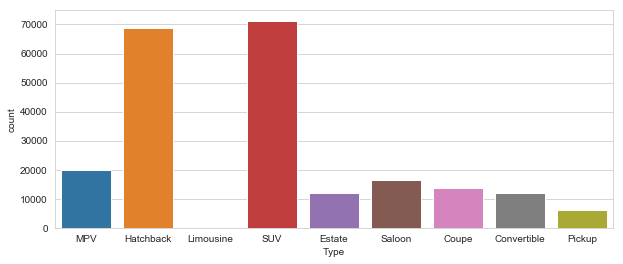

In [17]:
# Countplot of car types
fig_dims = (10, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='Type', data=df, ax=ax)

In [18]:
# Looking at rows with missing miles entry, and later year
df[df.Miles != df.Miles]

,Make,Model,Price,Year,Type,Miles,Litres,BHP,Transmission,Fuel,Owners,ULEZ
1260,Ford,Ecosport,22900.0,NaN,SUV,NaN,1.0,125PS,Manual,Petrol,NaN,1
1267,Ford,Ecosport,21950.0,NaN,SUV,NaN,1.0,125PS,Manual,Petrol,NaN,1
1268,Ford,Ecosport,22900.0,NaN,SUV,NaN,1.0,125PS,Manual,Petrol,NaN,1
1269,Ford,Ecosport,21000.0,NaN,SUV,NaN,1.0,125PS,Automatic,Petrol,NaN,1
1273,Ford,Ecosport,23500.0,NaN,SUV,NaN,1.0,140PS,Manual,Petrol,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
96015,Renault,All,23455.0,NaN,SUV,NaN,1.3,130PS,Automatic,Petrol,NaN,1
96020,Renault,All,27945.0,NaN,SUV,NaN,1.3,155PS,Automatic,Petrol,NaN,1
96021,Renault,Captur,26355.0,NaN,SUV,NaN,1.5,115PS,Automatic,Diesel,NaN,1
96023,Renault,All,27154.0,NaN,SUV,NaN,1.3,155PS,Automatic,Petrol,NaN,1


In [19]:
dfnyr = df[df.Year != df.Year]
dfnboth = dfnyr[df.Miles != df.Miles]
dfnboth

# Drop rows with both year and miles null
df = df.drop(dfnboth.index).reset_index(drop=True)

/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


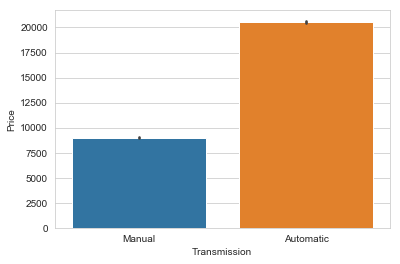

In [20]:
sns.barplot(x='Transmission', y='Price', data=df)

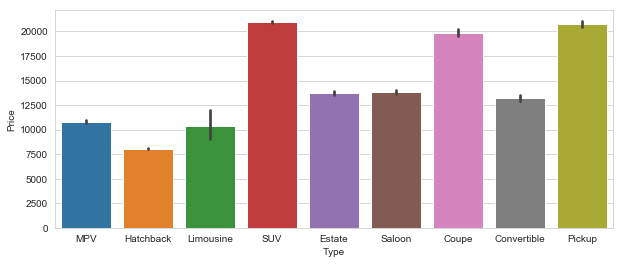

In [21]:
fig_dims = (10, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='Type', y='Price', data=df, ax=ax)

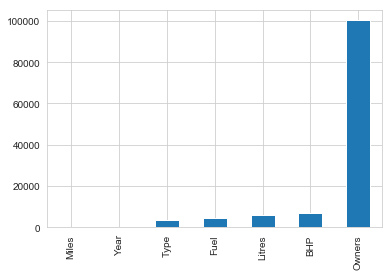

In [22]:
# Looking again at null values
sns.set_style("whitegrid")
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [23]:
df[df.Miles != df.Miles]

,Make,Model,Price,Year,Type,Miles,Litres,BHP,Transmission,Fuel,Owners,ULEZ
3722,Ford,Ka+,12890.0,2019.0,Hatchback,NaN,1.2,85PS,Manual,Petrol,NaN,1
4489,Ford,Ranger,7995.0,2011.0,Pickup,NaN,2.5,140BHP,Manual,Diesel,NaN,0
4647,Ford,Ranger,28776.0,2020.0,Pickup,NaN,2.0,170PS,Manual,Diesel,NaN,1
4702,Ford,Ranger,28776.0,2020.0,Pickup,NaN,2.0,170PS,Manual,Diesel,NaN,1
4748,Ford,Ranger,23980.0,2018.0,Pickup,NaN,3.2,200PS,Automatic,Diesel,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
74715,Mitsubishi,Mirage,9500.0,2020.0,Hatchback,NaN,1.2,80PS,Manual,Petrol,NaN,1
77068,Renault,Clio,1500.0,2012.0,Hatchback,NaN,1.2,75BHP,Manual,Petrol,NaN,1
77429,Renault,Megane,5990.0,2010.0,Convertible,NaN,1.9,130BHP,Manual,Diesel,2.0,0
78119,Renault,Captur,8499.0,2017.0,SUV,NaN,1.5,90PS,Manual,Diesel,NaN,1


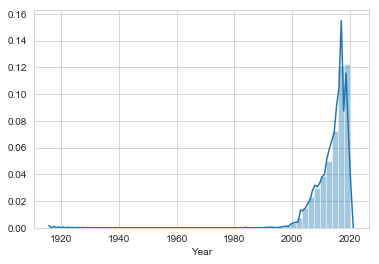

In [24]:
sns.distplot(df.Year)

In [25]:
# Removing year outliers

def year_outlier(yr, df):
    
    dfyrout = df[df.Year < yr]
    df = df.drop(dfyrout.index).reset_index(drop=True)
    
    return df

df = year_outlier(1997, df)

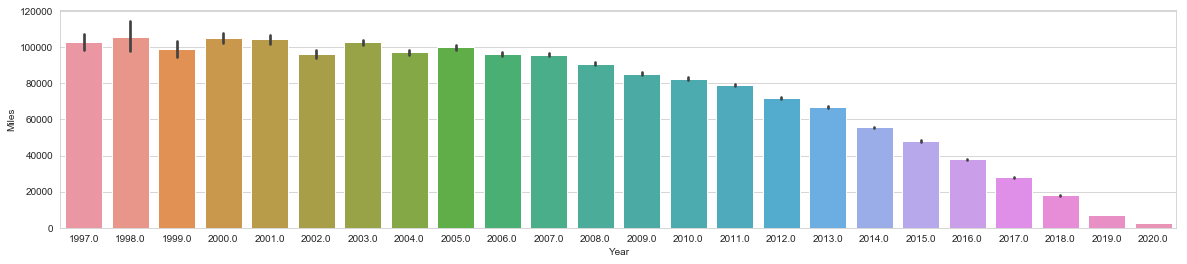

In [26]:
fig_dims = (20, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='Year', y='Miles', data=df, ax=ax)

Now, I will fill in null mile and year entries

In [27]:
dfnmil = df[df.Miles != df.Miles]
dfnmil

,Make,Model,Price,Year,Type,Miles,Litres,BHP,Transmission,Fuel,Owners,ULEZ
3709,Ford,Ka+,12890.0,2019.0,Hatchback,NaN,1.2,85PS,Manual,Petrol,NaN,1
4476,Ford,Ranger,7995.0,2011.0,Pickup,NaN,2.5,140BHP,Manual,Diesel,NaN,0
4634,Ford,Ranger,28776.0,2020.0,Pickup,NaN,2.0,170PS,Manual,Diesel,NaN,1
4689,Ford,Ranger,28776.0,2020.0,Pickup,NaN,2.0,170PS,Manual,Diesel,NaN,1
4735,Ford,Ranger,23980.0,2018.0,Pickup,NaN,3.2,200PS,Automatic,Diesel,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
74086,Mitsubishi,Mirage,9500.0,2020.0,Hatchback,NaN,1.2,80PS,Manual,Petrol,NaN,1
76439,Renault,Clio,1500.0,2012.0,Hatchback,NaN,1.2,75BHP,Manual,Petrol,NaN,1
76799,Renault,Megane,5990.0,2010.0,Convertible,NaN,1.9,130BHP,Manual,Diesel,2.0,0
77489,Renault,Captur,8499.0,2017.0,SUV,NaN,1.5,90PS,Manual,Diesel,NaN,1


In [28]:
df[df.Year == df.iloc[1].Year].Miles.mean()

67026.90625

In [29]:
for i in range(len(df)):
    if df.iloc[i].Miles != df.iloc[i].Miles:
        df.at[i, 'Miles'] = df[df.Year == df.iloc[i].Year].Miles.mean()
    if i%1000 == 0:
        print(i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


In [30]:
df[df.Year != df.Year]

,Make,Model,Price,Year,Type,Miles,Litres,BHP,Transmission,Fuel,Owners,ULEZ
20,Ford,B-Max,6600.0,NaN,MPV,46000.0,NaN,NaN,Manual,Petrol,NaN,0
23,Ford,B-Max,6600.0,NaN,MPV,46000.0,NaN,NaN,Manual,Petrol,NaN,0
26,Ford,B-Max,6600.0,NaN,MPV,46000.0,NaN,NaN,Manual,Petrol,NaN,0
35,Ford,B-Max,6600.0,NaN,MPV,46000.0,NaN,NaN,Manual,Petrol,NaN,0
43,Ford,B-Max,6600.0,NaN,MPV,46000.0,NaN,NaN,Manual,Petrol,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
76927,Renault,Zoe,7990.0,NaN,Hatchback,14600.0,NaN,NaN,Automatic,NaN,2.0,0
76961,Renault,Zoe,13490.0,NaN,Hatchback,25880.0,NaN,NaN,Automatic,NaN,1.0,0
76962,Renault,Zoe,13990.0,NaN,Hatchback,14725.0,NaN,NaN,Automatic,NaN,1.0,0
76966,Renault,Zoe,16990.0,NaN,Hatchback,12124.0,NaN,NaN,Automatic,NaN,2.0,0


In [31]:
d = {1997: '', 1998: '', 1999: '', 2000: '', 2001: '', 2002: '', 2003: '', 2004: '', 2005: '', 2006: '',
    2007: '', 2008: '', 2009: '', 2010: '', 2011: '', 2012: '', 2013: '', 2014: '', 2015: '', 2016: '',
    2017: '', 2018: '', 2019: '', 2020: ''}
for key, value in d.items():
    d[key] = df[df.Year == key].Miles.mean()
d

{1997: 102906.171875,
 1998: 105770.5390625,
 1999: 98753.7421875,
 2000: 105133.03125,
 2001: 104200.6328125,
 2002: 96253.71875,
 2003: 102705.25,
 2004: 97040.3046875,
 2005: 99787.765625,
 2006: 96293.140625,
 2007: 95698.296875,
 2008: 90750.1640625,
 2009: 85254.2265625,
 2010: 82548.21875,
 2011: 78901.9453125,
 2012: 72038.59375,
 2013: 67026.8984375,
 2014: 55550.0,
 2015: 48115.1171875,
 2016: 37877.24609375,
 2017: 27961.56640625,
 2018: 18007.76953125,
 2019: 7233.79541015625,
 2020: 2574.14453125}

In [32]:
d.values()

dict_values([102906.171875, 105770.5390625, 98753.7421875, 105133.03125, 104200.6328125, 96253.71875, 102705.25, 97040.3046875, 99787.765625, 96293.140625, 95698.296875, 90750.1640625, 85254.2265625, 82548.21875, 78901.9453125, 72038.59375, 67026.8984375, 55550.0, 48115.1171875, 37877.24609375, 27961.56640625, 18007.76953125, 7233.79541015625, 2574.14453125])

In [33]:
for i in range(len(df)):
    if df.iloc[i].Year != df.iloc[i].Year:
        search = min(d.values(), key=lambda x:abs(x-df.iloc[i].Miles))
        for key, value in d.items():
            if value == search:
                df.at[i, 'Year'] = key
    if i%1000 == 0:
        print(i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


In [34]:
df.Year.unique()

array([2014., 2013., 2016., 2015., 2017., 2012., 2018., 2002., 2007.,
       2008., 2011., 2009., 2006., 2010., 2003., 2005., 2001., 2019.,
       2004., 1998., 2020., 2000., 1999., 1997.])

In [35]:
df.corr()

,Price,Year,Miles,Litres,Owners,ULEZ
Price,1.000000,0.521858,-0.479533,0.414701,-0.320892,0.222924
Year,0.521858,1.000000,-0.735888,-0.199322,-0.642673,0.460485
Miles,-0.479533,-0.735888,1.000000,0.198395,0.503325,-0.473863
Litres,0.414701,-0.199322,0.198395,1.000000,0.214453,-0.236203
Owners,-0.320892,-0.642673,0.503325,0.214453,1.000000,-0.297659
ULEZ,0.222924,0.460485,-0.473863,-0.236203,-0.297659,1.000000


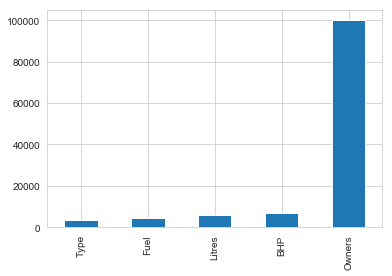

In [36]:
sns.set_style("whitegrid")
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [37]:
df[df.Type != df.Type]

,Make,Model,Price,Year,Type,Miles,Litres,BHP,Transmission,Fuel,Owners,ULEZ
146,Ford,Ka,6200.0,2015.0,NaN,29803.0,NaN,NaN,Manual,Petrol,2.0,0
152,Ford,Ka,6200.0,2015.0,NaN,14714.0,NaN,NaN,Manual,Petrol,2.0,0
189,Ford,Ka,450.0,2004.0,NaN,71000.0,1.3,59BHP,Manual,Petrol,2.0,0
206,Ford,Ka,3100.0,2011.0,NaN,54500.0,NaN,NaN,Manual,Petrol,NaN,0
216,Ford,Ka,3100.0,2011.0,NaN,54500.0,NaN,NaN,Manual,Petrol,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
138058,Mercedes-Benz,V,47995.0,2018.0,NaN,12000.0,2.2,190PS,Automatic,Diesel,1.0,1
138059,Mercedes-Benz,V,48500.0,2018.0,NaN,4500.0,2.2,163PS,Automatic,Diesel,1.0,1
138060,Mercedes-Benz,V,47495.0,2019.0,NaN,3450.0,2.2,163PS,Automatic,Diesel,1.0,1
138061,Mercedes-Benz,V,41995.0,2018.0,NaN,2250.0,2.2,190PS,Automatic,Diesel,2.0,1


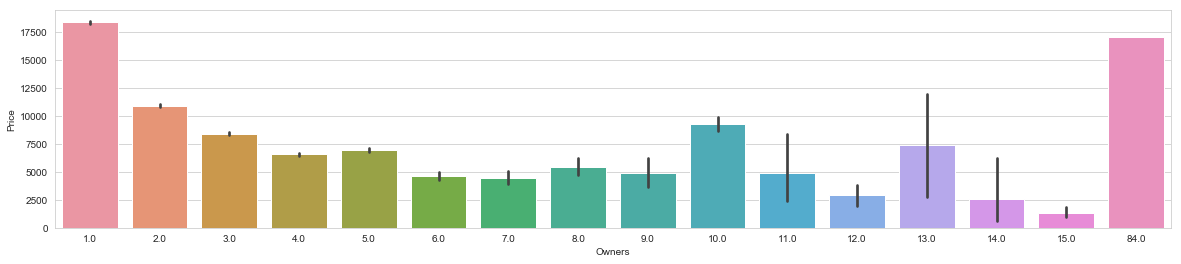

In [38]:
fig_dims = (20, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='Owners', y='Price', data=df, ax=ax)

In [39]:
# Fill in missing Type entries
for i in range(len(df)):
    if df.iloc[i].Type != df.iloc[i].Type:
        try:
            df.at[i, 'Type'] = df[df.Model == df.iloc[i].Model].Type.value_counts().index[0]
        except:
            df.drop(i)
    if i%1000 == 0:
        print(i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


In [40]:
df[df.Model == df.iloc[1000].Model].Fuel.value_counts().index[0]

'Petrol'

In [41]:
# Fill in missing Fuel entries
for i in range(len(df)):
    if df.iloc[i].Fuel != df.iloc[i].Fuel:
        try:
            df.at[i, 'Fuel'] = df[df.Model == df.iloc[i].Model].Fuel.value_counts().index[0]
        except:
            df.drop(i)
    if i%1000 == 0:
        print(i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


In [42]:
dfnl = df[df.Litres != df.Litres]
dfnlb = dfnl[dfnl.BHP != dfnl.BHP]

In [43]:
df = df.drop(dfnlb.index).reset_index(drop=True)

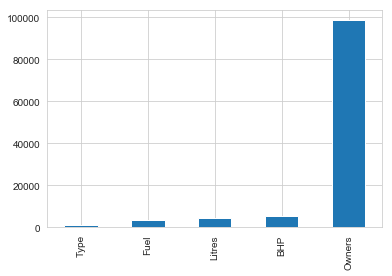

In [44]:
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [45]:
# Fill in missing Litres entries
for i in range(len(df)):
    if df.iloc[i].Litres != df.iloc[i].Litres:
        try:
            df2 = df[df.Model == df.iloc[i].Model]
            df.at[i, 'Litres'] = df2[df2.BHP == df2.iloc[i].BHP].Litres.value_counts().index[0]
        except:
            df.drop(i)
    if i%1000 == 0:
        print(i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


In [46]:
# Fill in missing Litres entries
for i in range(len(df)):
    if df.iloc[i].BHP != df.iloc[i].BHP:
        try:
            df2 = df[df.Model == df.iloc[i].Model]
            df.at[i, 'BHP'] = df2[df2.Litres == df2.iloc[i].Litres].BHP.value_counts().index[0]
        except:
            df.drop(i)
    if i%1000 == 0:
        print(i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


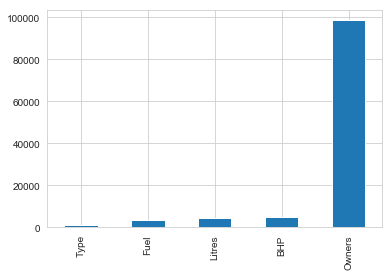

In [47]:
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

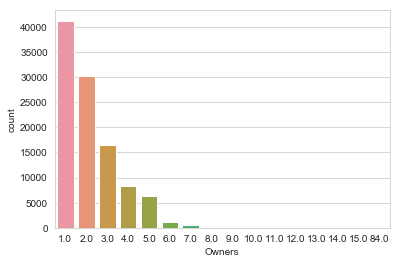

In [48]:
sns.countplot(df.Owners)

In [49]:
df = df[df.Owners <= 11]

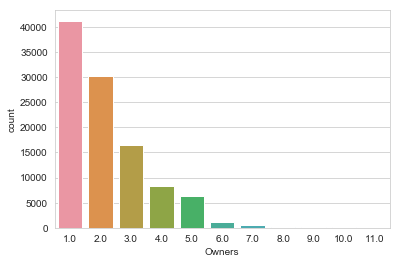

In [50]:
sns.countplot(df.Owners)

In [51]:
df = df[df.Owners <= 7]

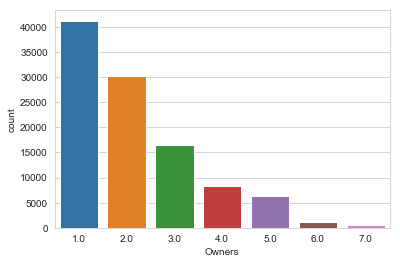

In [52]:
sns.countplot(df.Owners)

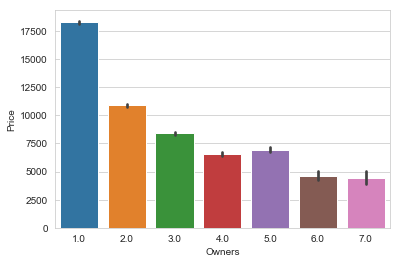

In [53]:
sns.barplot(x='Owners', y='Price', data=df)

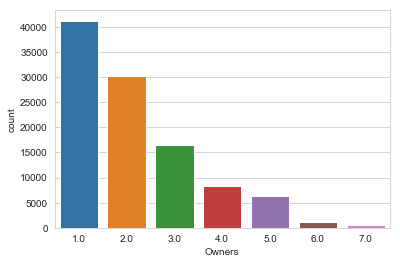

In [54]:
sns.countplot(x='Owners', data=df)

In [55]:
df[df.Miles == df.iloc[0].Miles].Owners.value_counts().index[0]

5.0

In [56]:
# Fixing Owners column

d = {1: '', 2: '', 3: '', 4: '', 5: '', 6: '', 7: ''}
for key, value in d.items():
    d[key] = df[df.Owners == key].Miles.mean()
d

{1: 31339.58984375,
 2: 58905.7265625,
 3: 74605.578125,
 4: 87083.2890625,
 5: 95168.5546875,
 6: 106495.7890625,
 7: 112814.328125}

In [57]:
for i in range(len(df)):
    if df.iloc[i].Owners != df.iloc[i].Owners:
        search = min(d.values(), key=lambda x:abs(x-df.iloc[i].Miles))
        for key, value in d.items():
            if value == search:
                df.at[i, 'Owners'] = key
    if i%1000 == 0:
        print(i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000


In [58]:
'''
df['2+_Owners'] = df['Owners'] > 1
df['1_Owner'] = df['Owners'] == 1
d = {True: 1, False: 0}
df= df.replace(d)
df = df.drop('Owners', axis=1)
'''

"\ndf['2+_Owners'] = df['Owners'] > 1\ndf['1_Owner'] = df['Owners'] == 1\nd = {True: 1, False: 0}\ndf= df.replace(d)\ndf = df.drop('Owners', axis=1)\n"

In [59]:
df = df.dropna(axis=0)

In [60]:
def clean_ps(x):
    
    ps = float(x[:-2])
    bhp = int(round(ps/1.014))
    
    return bhp

def clean_bhp(x):
    
    bhp = int(round(float(x[:-3])))
    
    return bhp

In [61]:
df['BHP'] = df['BHP'].apply(lambda x: clean_ps(x) if 'PS' in x else clean_bhp(x))

In [62]:
def clean_hybrid(x):
     return 'Hybrid'
    
df['Fuel'] = df['Fuel'].apply(lambda x: clean_hybrid(x) if 'Hybrid' in x else x)

In [63]:
'''
def clean_bhp(df):
    
    for i in range(len(df)):
        if 'PS' in df.iloc[i]['BHP']:
            ps = float(df.iloc[i]['BHP'][:-2])
            bhp = ps/1.014
            new = str(bhp) + 'BHP'
            df.at[i, 'BHP'] = new
            print('1, '+i)
    for i in range(len(df)):
        df.at[i, 'BHP'] = int(round(float(df.iloc[i]['BHP'][:-3])))
        print('2, '+i)
    
    df['BHP'] = pd.to_numeric(df['BHP'], downcast='signed')
    
    return df
'''

"\ndef clean_bhp(df):\n    \n    for i in range(len(df)):\n        if 'PS' in df.iloc[i]['BHP']:\n            ps = float(df.iloc[i]['BHP'][:-2])\n            bhp = ps/1.014\n            new = str(bhp) + 'BHP'\n            df.at[i, 'BHP'] = new\n            print('1, '+i)\n    for i in range(len(df)):\n        df.at[i, 'BHP'] = int(round(float(df.iloc[i]['BHP'][:-3])))\n        print('2, '+i)\n    \n    df['BHP'] = pd.to_numeric(df['BHP'], downcast='signed')\n    \n    return df\n"

In [64]:
df.isnull().sum()

Make            0
Model           0
Price           0
Year            0
Type            0
Miles           0
Litres          0
BHP             0
Transmission    0
Fuel            0
Owners          0
ULEZ            0
dtype: int64

In [65]:
#data = clean_bhp(df)

In [66]:
data=df

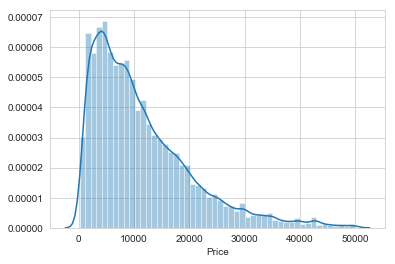

In [67]:
sns.distplot(data[data['Price']<50000]['Price'])

In [68]:
data = data[data['Price']<50000]

In [69]:
data.Price.skew()

1.3678389

In [70]:
data['log_price'] = np.log(data.Price)

/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


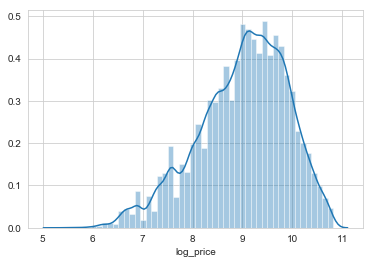

In [71]:
sns.distplot(data.log_price)

In [72]:
data.log_price.skew()

-0.5403945

In [73]:
data['sqrt_price'] = np.sqrt(data.Price)

/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [74]:
data.sqrt_price.skew()

0.46722203

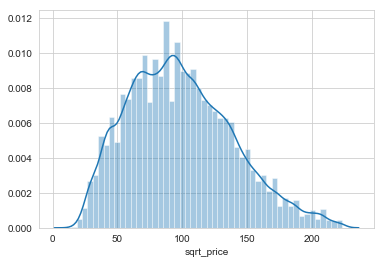

In [75]:
sns.distplot(data.sqrt_price)

In [76]:
data = data.drop('log_price', axis=1)

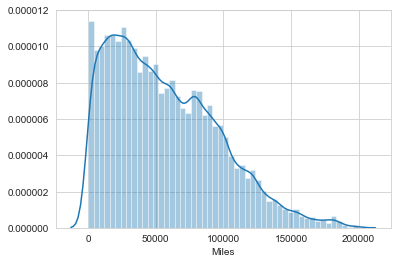

In [77]:
sns.distplot(data[data.Miles < 200000].Miles)

In [78]:
data = data[data.Miles<200000]

In [79]:
data.Miles.skew()

0.70180434

In [80]:
data['sqrt_miles'] = np.sqrt(data.Miles)
data['log_miles'] = np.log(data.Miles)

-0.13282676


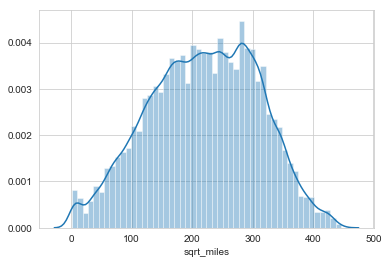

In [81]:
print(data.sqrt_miles.skew())
sns.distplot(data.sqrt_miles)

-2.6940968


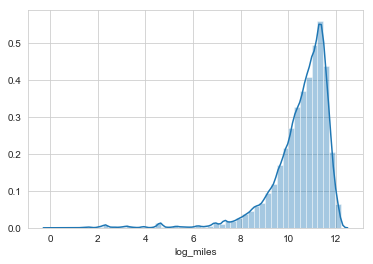

In [82]:
print(data.log_miles.skew())
sns.distplot(data.log_miles)

In [83]:
data = data.drop('log_miles', axis=1)

In [84]:
data

,Make,Model,Price,Year,Type,Miles,Litres,BHP,Transmission,Fuel,Owners,ULEZ,sqrt_price,sqrt_miles
0,Ford,B-Max,4985.0,2013.0,MPV,34516.0,1.6,104,Automatic,Petrol,5.0,1,70.604530,185.784821
1,Ford,B-Max,7500.0,2016.0,MPV,24000.0,1.0,123,Manual,Petrol,2.0,1,86.602539,154.919327
2,Ford,B-Max,5990.0,2015.0,MPV,10800.0,1.6,104,Automatic,Petrol,3.0,1,77.395088,103.923050
3,Ford,B-Max,4999.0,2013.0,MPV,84789.0,1.6,104,Automatic,Petrol,2.0,1,70.703606,291.185516
4,Ford,B-Max,9999.0,2016.0,MPV,9372.0,1.6,104,Automatic,Petrol,1.0,1,99.995003,96.809090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203592,Renault,Twingo,7250.0,2018.0,Hatchback,9260.0,1.0,69,Manual,Petrol,1.0,1,85.146935,96.228897
203594,Renault,Twingo,5500.0,2016.0,Hatchback,33516.0,1.0,69,Manual,Petrol,1.0,1,74.161987,183.073761
203595,Renault,Twingo,6949.0,2016.0,Hatchback,13000.0,0.9,89,Manual,Petrol,2.0,1,83.360664,114.017540
203600,Renault,Twingo,5495.0,2015.0,Hatchback,25000.0,1.0,69,Manual,Petrol,2.0,1,74.128265,158.113876


In [85]:
data['age'] = 2021 - data['Year']

In [86]:
data

,Make,Model,Price,Year,Type,Miles,Litres,BHP,Transmission,Fuel,Owners,ULEZ,sqrt_price,sqrt_miles,age
0,Ford,B-Max,4985.0,2013.0,MPV,34516.0,1.6,104,Automatic,Petrol,5.0,1,70.604530,185.784821,8.0
1,Ford,B-Max,7500.0,2016.0,MPV,24000.0,1.0,123,Manual,Petrol,2.0,1,86.602539,154.919327,5.0
2,Ford,B-Max,5990.0,2015.0,MPV,10800.0,1.6,104,Automatic,Petrol,3.0,1,77.395088,103.923050,6.0
3,Ford,B-Max,4999.0,2013.0,MPV,84789.0,1.6,104,Automatic,Petrol,2.0,1,70.703606,291.185516,8.0
4,Ford,B-Max,9999.0,2016.0,MPV,9372.0,1.6,104,Automatic,Petrol,1.0,1,99.995003,96.809090,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203592,Renault,Twingo,7250.0,2018.0,Hatchback,9260.0,1.0,69,Manual,Petrol,1.0,1,85.146935,96.228897,3.0
203594,Renault,Twingo,5500.0,2016.0,Hatchback,33516.0,1.0,69,Manual,Petrol,1.0,1,74.161987,183.073761,5.0
203595,Renault,Twingo,6949.0,2016.0,Hatchback,13000.0,0.9,89,Manual,Petrol,2.0,1,83.360664,114.017540,5.0
203600,Renault,Twingo,5495.0,2015.0,Hatchback,25000.0,1.0,69,Manual,Petrol,2.0,1,74.128265,158.113876,6.0


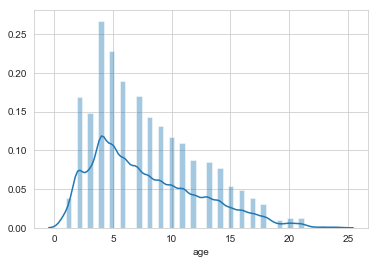

In [87]:
sns.distplot(data.age)

In [88]:
data['sqrt_age'] = np.sqrt(data.age)
data['log_age'] = np.log(data.age)

0.19944119263766938


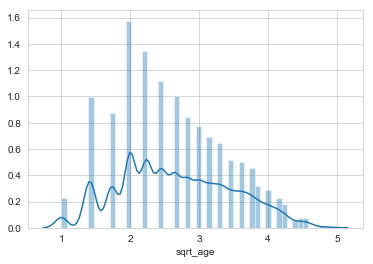

In [89]:
print(data.sqrt_age.skew())
sns.distplot(data.sqrt_age)

-0.4842068240336796


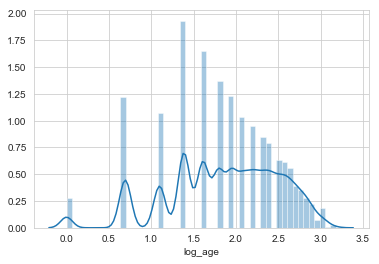

In [90]:
print(data.log_age.skew())
sns.distplot(data.log_age)

In [91]:
data = data.drop('log_age', axis=1)

In [92]:
data.to_csv('final_cleaned')